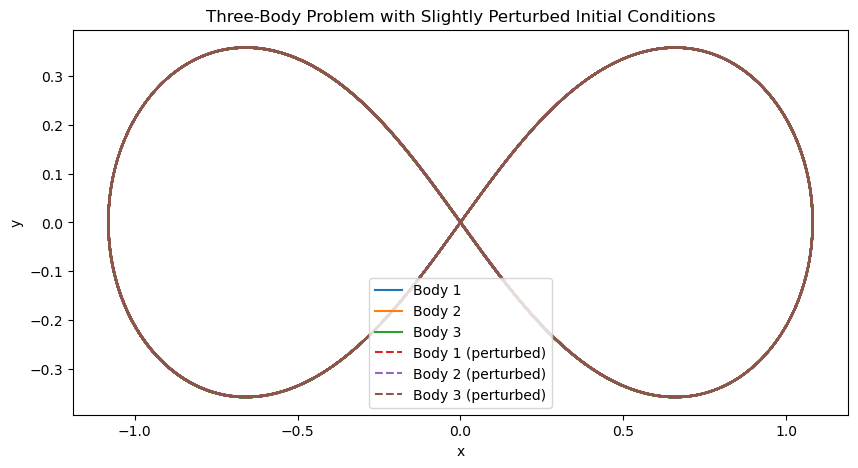

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# 定义三体问题的微分方程
def three_body(t, y, G, m1, m2, m3):
    r1, r2, r3 = y[:2], y[2:4], y[4:6]
    v1, v2, v3 = y[6:8], y[8:10], y[10:12]
    
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)
    
    dv1dt = G * m2 * (r2 - r1) / r12**3 + G * m3 * (r3 - r1) / r13**3
    dv2dt = G * m1 * (r1 - r2) / r12**3 + G * m3 * (r3 - r2) / r23**3
    dv3dt = G * m1 * (r1 - r3) / r13**3 + G * m2 * (r2 - r3) / r23**3
    
    return np.concatenate((v1, v2, v3, dv1dt, dv2dt, dv3dt))

# 初始条件
G = 1
m1 = m2 = m3 = 1

y0 = np.array([0.97000436, -0.24308753, -0.97000436, 0.24308753, 0, 0, 
               0.466203685, 0.43236573, 0.466203685, 0.43236573, -0.93240737, -0.86473146])

# 轻微改变初始条件
y0_perturbed = y0 + 1e-5 * np.random.rand(12)

# 解决初始问题
sol = solve_ivp(three_body, [0, 100], y0, args=(G, m1, m2, m3), rtol=1e-9, atol=1e-9)
sol_perturbed = solve_ivp(three_body, [0, 100], y0_perturbed, args=(G, m1, m2, m3), rtol=1e-9, atol=1e-9)

# 绘图
plt.figure(figsize=(10, 5))
plt.plot(sol.y[0], sol.y[1], label='Body 1')
plt.plot(sol.y[2], sol.y[3], label='Body 2')
plt.plot(sol.y[4], sol.y[5], label='Body 3')
plt.plot(sol_perturbed.y[0], sol_perturbed.y[1], '--', label='Body 1 (perturbed)')
plt.plot(sol_perturbed.y[2], sol_perturbed.y[3], '--', label='Body 2 (perturbed)')
plt.plot(sol_perturbed.y[4], sol_perturbed.y[5], '--', label='Body 3 (perturbed)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Three-Body Problem with Slightly Perturbed Initial Conditions')
plt.show()


In [2]:
import scipy.constants as CONSTANTS

print(CONSTANTS.G)

6.6743e-11


In [6]:
import numpy as np
a = np.float64(1.2056548)
type(a)

numpy.float64

In [8]:
np.zeros(2, dtype=np.float64)

array([0., 0.])

In [4]:
import numpy as np
from threebody import MP
mp1 = MP(np.array([1e8,2e8], dtype=np.float64), np.float64(3.0e15))
mp2 = MP(np.array([0.5e8,0.5e8], dtype=np.float64), np.float64(2.0e15))
mp3 = MP(np.array([1e8,4e8], dtype=np.float64), np.float64(3.0e15))



In [31]:
mps = [mp1, mp2, mp3]
for i in range(30):
    for _mp in mps:
        _mp.calc_a(mps)
    for _mp in mps:
        _mp.update_move(36000)
    print(mp1.pos)

[1.00000338e+08 2.00001126e+08]
[1.00000338e+08 2.00001129e+08]
[1.00000339e+08 2.00001132e+08]
[1.00000340e+08 2.00001135e+08]
[1.00000341e+08 2.00001138e+08]
[1.00000342e+08 2.00001141e+08]
[1.00000343e+08 2.00001144e+08]
[1.00000344e+08 2.00001147e+08]
[1.00000345e+08 2.00001150e+08]
[1.00000346e+08 2.00001153e+08]
[1.00000347e+08 2.00001156e+08]
[1.00000348e+08 2.00001159e+08]
[1.00000348e+08 2.00001162e+08]
[1.00000349e+08 2.00001165e+08]
[1.00000350e+08 2.00001168e+08]
[1.00000351e+08 2.00001172e+08]
[1.00000352e+08 2.00001175e+08]
[1.00000353e+08 2.00001178e+08]
[1.00000354e+08 2.00001181e+08]
[1.00000355e+08 2.00001184e+08]
[1.00000356e+08 2.00001187e+08]
[1.00000357e+08 2.00001190e+08]
[1.00000358e+08 2.00001193e+08]
[1.00000359e+08 2.00001196e+08]
[1.00000359e+08 2.00001199e+08]
[1.00000360e+08 2.00001202e+08]
[1.00000361e+08 2.00001205e+08]
[1.00000362e+08 2.00001208e+08]
[1.00000363e+08 2.00001212e+08]
[1.00000364e+08 2.00001215e+08]


In [15]:
print(0.5e8)

50000000.0


In [32]:
a = np.array([[1,2],[9,3],[3,4]])
xs = np.sort([item[0] for item in a])
xs

array([1, 3, 9])